# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Log-transform" data-toc-modified-id="Log-transform-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Log transform</a></div><div class="lev1 toc-item"><a href="#yellowbrick-plots-of-regressor" data-toc-modified-id="yellowbrick-plots-of-regressor-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>yellowbrick plots of regressor</a></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Log-transform" data-toc-modified-id="Log-transform-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Log transform</a></span></li><li><span><a href="#yellowbrick-plots-of-regressor" data-toc-modified-id="yellowbrick-plots-of-regressor-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>yellowbrick plots of regressor</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
np.random.seed(0)
x = np.arange(1,101)
y = x * 5 + 100 + np.random.normal(x,2*x,100)

print(y[-5:])

[ 811.66204829  684.03700402 1038.03061681  719.12859436  780.39787269]


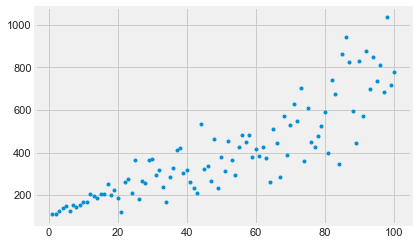

In [3]:
plt.plot(x,y,'.')

In [4]:
# get Breusch-Pagan test
# http://www.statsmodels.org/devel/examples/notebooks/generated/regression_diagnostics.html


In [5]:
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [6]:
#x1 = sm.add_constant(x)
results = smf.OLS(y,x).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1517.
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           7.66e-62
Time:                        09:54:53   Log-Likelihood:                -615.05
No. Observations:                 100   AIC:                             1232.
Df Residuals:                      99   BIC:                             1235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.6362      0.196     38.947      0.0

In [7]:
name = ['p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('p-value', 40.15767380703137)]

# Log transform

In [8]:
xlog = np.log(x)
ylog = np.log(y)
ylog

array([4.69618118, 4.73268904, 4.81925223, 4.95531387, 5.00176662,
       4.82247807, 5.0453667 , 4.98071398, 5.02481469, 5.12522491,
       5.13089797, 5.33224798, 5.2871906 , 5.23328219, 5.31476091,
       5.33115999, 5.53259347, 5.30138417, 5.42007725, 5.22486548,
       4.77722613, 5.56359745, 5.62677207, 5.33934452, 5.89574554,
       5.19502685, 5.57773145, 5.55108847, 5.89413061, 5.90852177,
       5.68902999, 5.75638252, 5.47816144, 5.13170678, 5.65475381,
       5.79074618, 6.0235481 , 6.0387795 , 5.71633176, 5.75515907,
       5.56075339, 5.44982954, 5.35309322, 6.283515  , 5.78114869,
       5.81620946, 5.57684732, 6.13694721, 5.46314518, 5.93681291,
       5.75150035, 6.11420828, 5.89675449, 5.69201931, 6.05654969,
       6.18202947, 6.1083204 , 6.18019622, 5.93793189, 6.03181698,
       5.95053793, 6.05775639, 5.92837449, 5.57229025, 6.24040332,
       6.09349057, 5.64740054, 6.3472813 , 5.96304662, 6.26771722,
       6.44497488, 6.31096053, 6.55727894, 5.88955855, 6.41403

In [9]:
results = smf.OLS(ylog,xlog).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     3175.
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           4.94e-77
Time:                        09:54:53   Log-Likelihood:                -144.14
No. Observations:                 100   AIC:                             290.3
Df Residuals:                      99   BIC:                             292.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5434      0.027     56.351      0.0

# yellowbrick plots of regressor

In [14]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

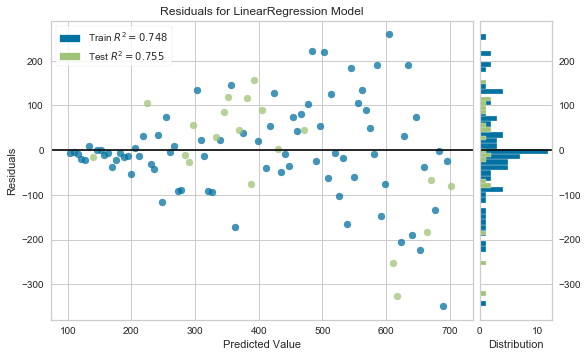

In [28]:
lr = LinearRegression()
viz = ResidualsPlot(lr)

x1d = x.reshape(-1,1)
y1d = y.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x1d,y1d,test_size=0.2)
viz.fit(x_train,y_train)
viz.score(x_test,y_test)
viz.poof() 

In [29]:
x_train.shape, y_train.shape

((80, 1), (80, 1))